In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
import sys, os
import pickle
import imageio
import numpy as np
from skimage import measure

# sys.path.append('../')
# from fastai.conv_learner import *
from fastai.dataset import *

from pathlib import Path
import json
from PIL import ImageDraw, ImageFont
from matplotlib import patches, patheffects

# check to make sure you set the device
# cuda_id = 1
# torch.cuda.set_device(cuda_id)

import pylab as p
from pylab import rcParams
rcParams['figure.figsize'] = 12, 12
rcParams.update({'font.size': 24})

In [4]:
############ Useful paths
# path1='data/boxnet/trainingdata/'
# files_list = os.listdir(path1)
# path2 = 'data/boxnet/trainingdata2/'
# path3 = 'data/boxnet/labels/'
path4 = 'data/boxnet/results/'
# PATH = Path('data/boxnet')
# IMAGES = 'trainingdata2'

In [5]:
version = "23"
# lambda_4a = "0.001"
# lambda_5a = "0.001"
# lambda_4b = "3e-05"
lambda_5b = "200.0"
lambda_4c = "1.0"
lambda_5c = "201.0"

# Generic

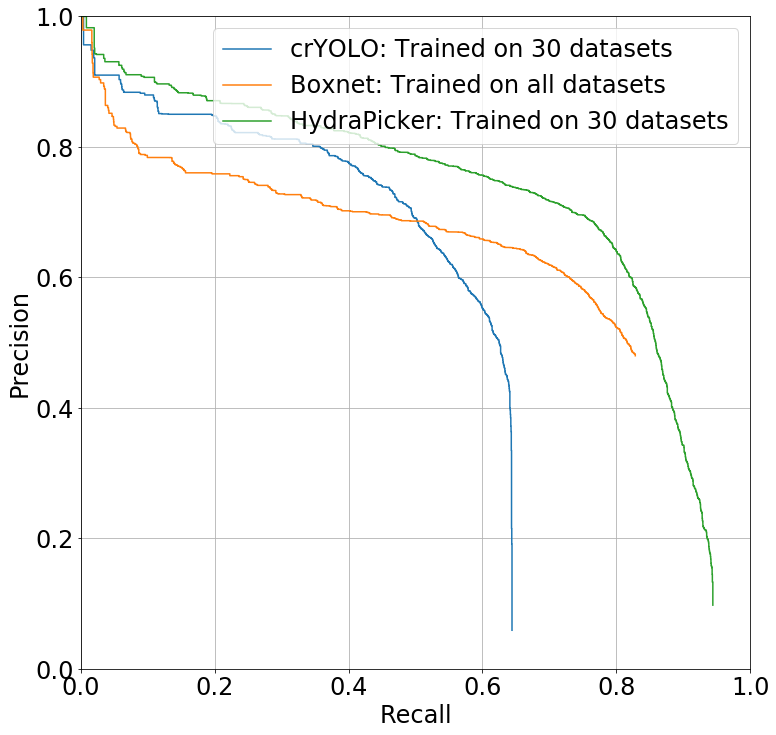

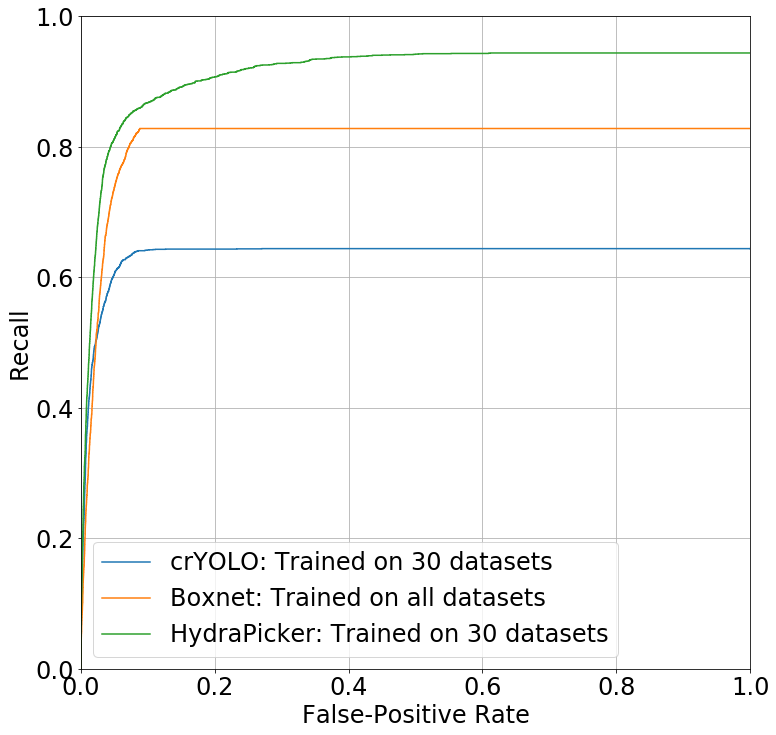

In [11]:
with open(path4+'SSPicker_'+version+'_2b_target_gen_rec2.pickle', 'rb') as handle:
    rec2_2b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_prec2.pickle', 'rb') as handle:
    prec2_2b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_fpr2.pickle', 'rb') as handle:
    fpr2_2b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_rec3.pickle', 'rb') as handle:
    rec3_2b = pickle.load(handle)

lambda_5b = "201.0"
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec2.pickle', 'rb') as handle:
    rec2_5b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec2.pickle', 'rb') as handle:
    prec2_5b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_fpr2.pickle', 'rb') as handle:
    fpr2_5b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec3.pickle', 'rb') as handle:
    rec3_5b = pickle.load(handle)

lambda_5b = "400.0"
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec2.pickle', 'rb') as handle:
    rec2_5b_400 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec2.pickle', 'rb') as handle:
    prec2_5b_400 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_fpr2.pickle', 'rb') as handle:
    fpr2_5b_400 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec3.pickle', 'rb') as handle:
    rec3_5b_400 = pickle.load(handle)

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_5b_400, prec2_5b_400, label='crYOLO: Trained on 30 datasets')
ax.plot(rec2_5b, prec2_5b, label='Boxnet: Trained on all datasets')
ax.plot(rec2_2b, prec2_2b, label='HydraPicker: Trained on 30 datasets')
ax.axis([0,1,0,1])
ax.set(xlabel='Recall', ylabel='Precision')
ax.grid()
ax.legend()

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(fpr2_5b_400, rec3_5b_400, label='crYOLO: Trained on 30 datasets')
ax.plot(fpr2_5b, rec3_5b, label='Boxnet: Trained on all datasets')
ax.plot(fpr2_2b, rec3_2b, label='HydraPicker: Trained on 30 datasets')
ax.axis([0,1,0,1])
ax.set(xlabel='False-Positive Rate', ylabel='Recall')
ax.grid()
ax.legend()

In [12]:
with open(path4+'SSPicker_'+version+'_2b_target_gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_2b_target_gen_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)

print('HydraPicker: Trained on 30 datasets')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)
print("\n")

lambda_5b = "201.0"
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)


print('Boxnet: Trained on all datasets')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)
print("\n")

lambda_5b = "400.0"
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)

print('crYOLO: Trained on 30 datasets')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)
print("\n")

HydraPicker: Trained on 30 datasets
AP:                           0.7145314417992912
Precision at recall=90:       0.34277238403452
Recall at precision=90:       0.11012747875354108
AROC:                         0.912923044648734


Boxnet: Trained on all datasets
AP:                           0.5828087780578143
Precision at recall=90:       0.0
Recall at precision=90:       0.029745042492917848
AROC:                         0.809453475878713


crYOLO: Trained on 30 datasets
AP:                           0.49641052578927997
Precision at recall=90:       0.0
Recall at precision=90:       0.059490084985835696
AROC:                         0.6344301952211822




In [8]:
version = "23"
# lambda_4a = "0.001"
# lambda_5a = "0.001"
lambda_4b = "100.0"
lambda_5b = "200.0"
lambda_4c = "3e-05"
lambda_5c = "201.0"

# Fine-Tuned

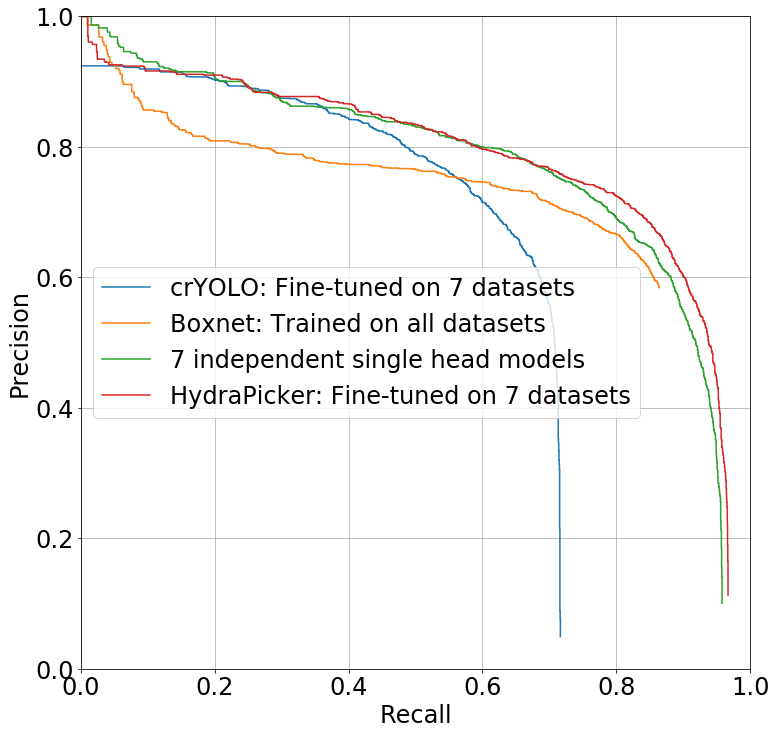

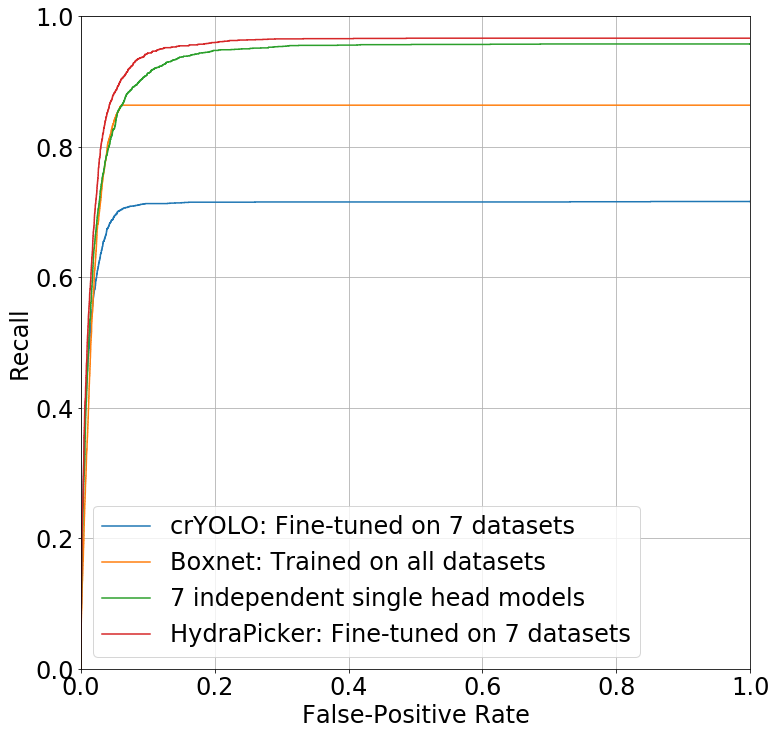

In [9]:
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_rec2.pickle', 'rb') as handle:
    rec2_4c = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_prec2.pickle', 'rb') as handle:
    prec2_4c = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_fpr2.pickle', 'rb') as handle:
    fpr2_4c = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_rec3.pickle', 'rb') as handle:
    rec3_4c = pickle.load(handle)

lambda_5b = "300.0"
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec2.pickle', 'rb') as handle:
    rec2_5b_300 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec2.pickle', 'rb') as handle:
    prec2_5b_300 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_fpr2.pickle', 'rb') as handle:
    fpr2_5b_300 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec3.pickle', 'rb') as handle:
    rec3_5b_300 = pickle.load(handle)

    
lambda_5b = "202.0"
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec2.pickle', 'rb') as handle:
    rec2_5b_200 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec2.pickle', 'rb') as handle:
    prec2_5b_200 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_fpr2.pickle', 'rb') as handle:
    fpr2_5b_200 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec3.pickle', 'rb') as handle:
    rec3_5b_200 = pickle.load(handle)
# with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_avgs2.pickle', 'rb') as handle:
#     avgs2_5b = pickle.load(handle)

lambda_5b = "401.0"
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec2.pickle', 'rb') as handle:
    rec2_5b_401 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec2.pickle', 'rb') as handle:
    prec2_5b_401 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_fpr2.pickle', 'rb') as handle:
    fpr2_5b_401 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec3.pickle', 'rb') as handle:
    rec3_5b_401 = pickle.load(handle)


fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_5b_401, prec2_5b_401, label='crYOLO: Fine-tuned on 7 datasets')
ax.plot(rec2_5b_200, prec2_5b_200, label='Boxnet: Trained on all datasets')
ax.plot(rec2_5b_300, prec2_5b_300, label='7 independent single head models')
ax.plot(rec2_4c, prec2_4c, label='HydraPicker: Fine-tuned on 7 datasets')
ax.axis([0,1,0,1])
ax.set(xlabel='Recall', ylabel='Precision')
ax.grid()
ax.legend()

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(fpr2_5b_401, rec3_5b_401, label='crYOLO: Fine-tuned on 7 datasets')
ax.plot(fpr2_5b_200, rec3_5b_200, label='Boxnet: Trained on all datasets')
ax.plot(fpr2_5b_300, rec3_5b_300, label='7 independent single head models')
ax.plot(fpr2_4c, rec3_4c, label='HydraPicker: Fine-tuned on 7 datasets')
ax.axis([0,1,0,1])
ax.set(xlabel='False-Positive Rate', ylabel='Recall')
ax.grid()
ax.legend()

In [10]:
lambda_5b = "401.0"
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)

print('crYOLO: Fine-tuned on 7 datasets')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)

print("\n")

lambda_5b = "202.0"
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)

print('Boxnet: Trained on all datasets')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)

print("\n")

with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_target_gen_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)

print('7 independent single head models')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)

print("\n")




with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4c_'+lambda_4c+'_target_spec_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)

    
print('HydraPicker: Fine-tuned on 7 datasets')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)

print("\n")

crYOLO: Fine-tuned on 7 datasets
AP:                           0.5897311510021634
Precision at recall=90:       0.0
Recall at precision=90:       0.21458923512747874
AROC:                         0.7071926540523064


Boxnet: Trained on all datasets
AP:                           0.6699133966389139
Precision at recall=90:       0.0
Recall at precision=90:       0.06232294617563739
AROC:                         0.8501433734458098


7 independent single head models
AP:                           0.7700147448549054
Precision at recall=90:       0.5475811827045053
Recall at precision=90:       0.24256373937677056
AROC:                         0.9338173672122527


HydraPicker: Fine-tuned on 7 datasets
AP:                           0.7813845182079207
Precision at recall=90:       0.6017330691026717
Recall at precision=90:       0.24291784702549576
AROC:                         0.9479099767511304




In [54]:
version = "23"
# lambda_4a = "0.001"
# lambda_5a = "0.001"
lambda_4b = "3e-05"
lambda_5b = "101.0"
# lambda_5b = "200.0"
lambda_4c = "3e-05"
lambda_5c = "201.0"

# Specialized on training

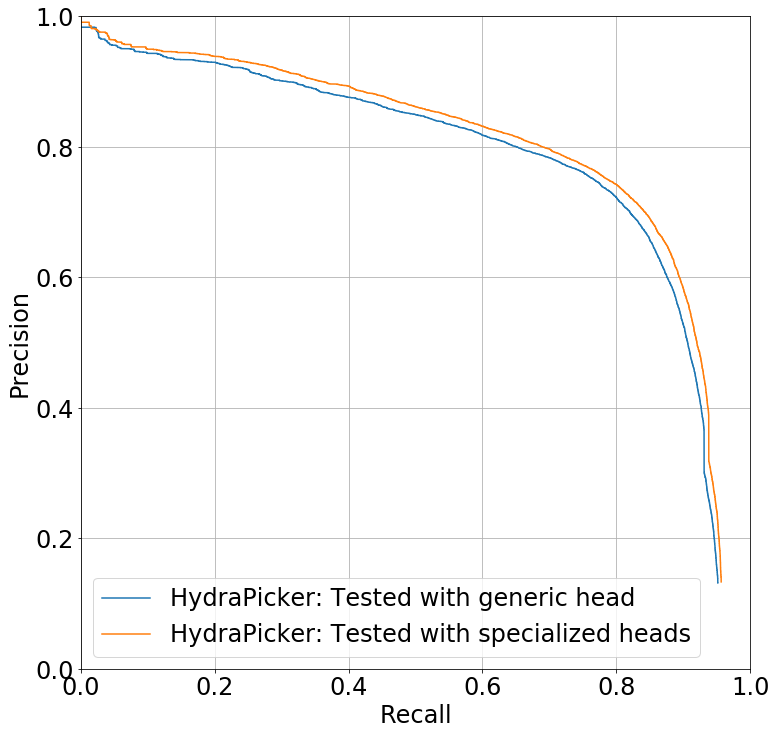

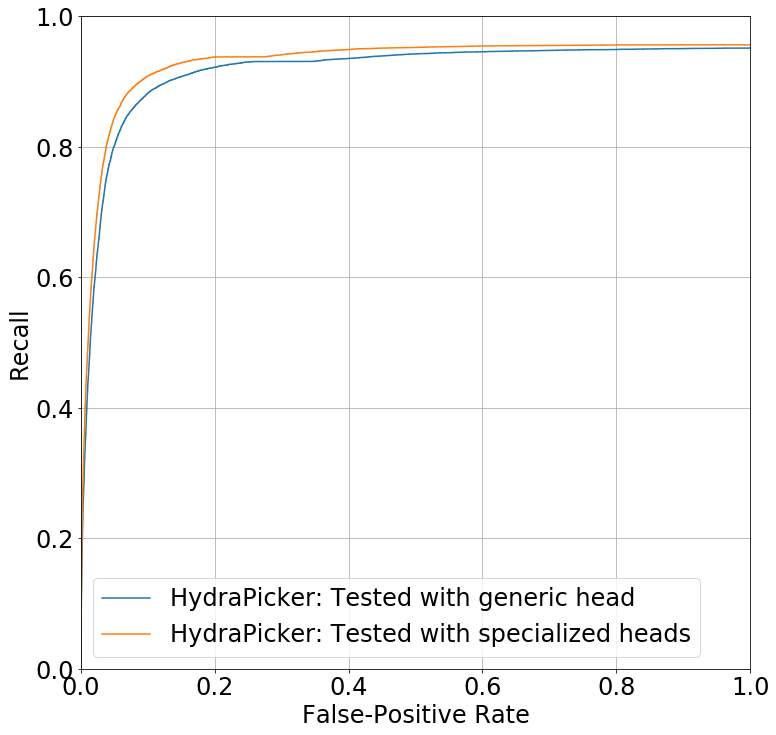

In [82]:
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_rec2.pickle', 'rb') as handle:
    rec2_4b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_prec2.pickle', 'rb') as handle:
    prec2_4b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_fpr2.pickle', 'rb') as handle:
    fpr2_4b = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_rec3.pickle', 'rb') as handle:
    rec3_4b = pickle.load(handle)

lambda_5b = "101.0"
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec2.pickle', 'rb') as handle:
    rec2_5b_101 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec2.pickle', 'rb') as handle:
    prec2_5b_101 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_fpr2.pickle', 'rb') as handle:
    fpr2_5b_101 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec3.pickle', 'rb') as handle:
    rec3_5b_101 = pickle.load(handle)

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(rec2_5b_101, prec2_5b_101, label='HydraPicker: Tested with generic head')
ax.plot(rec2_4b, prec2_4b, label='HydraPicker: Tested with specialized heads')
ax.axis([0,1,0,1])
ax.set(xlabel='Recall', ylabel='Precision')
ax.grid()
ax.legend()

fig = p.figure()
ax = fig.gca()
ax.set_autoscale_on(False)
ax.plot(fpr2_5b_101, rec3_5b_101, label='HydraPicker: Tested with generic head')
ax.plot(fpr2_4b, rec3_4b, label='HydraPicker: Tested with specialized heads')
ax.axis([0,1,0,1])
ax.set(xlabel='False-Positive Rate', ylabel='Recall')
ax.grid()
ax.legend()

In [81]:
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_4b_'+lambda_4b+'_source_spec_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)

print('HydraPicker: Tested with specialized heads')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)

print("\n")

with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auc.pickle', 'rb') as handle:
    auc = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_prec_at_rec90.pickle', 'rb') as handle:
    prec_at_rec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_rec_at_prec90.pickle', 'rb') as handle:
    rec_at_prec90 = pickle.load(handle)
with open(path4+'SSPicker_'+version+'_5b_'+lambda_5b+'_target_gen_auroc.pickle', 'rb') as handle:
    auroc = pickle.load(handle)

print('HydraPicker: Tested with generic head')
print("AP:                          ", auc)
print("Precision at recall=90:      ", prec_at_rec90)
print("Recall at precision=90:      ", rec_at_prec90)
print("AROC:                        ", auroc)

print("\n")

HydraPicker: Tested with specialized heads
AP:                           0.7975556280870933
Precision at recall=90:       0.5827736884847423
Recall at precision=90:       0.36231884057971014
AROC:                         0.9302713426303785


HydraPicker: Tested with generic head
AP:                           0.7793053651871034
Precision at recall=90:       0.5278263003729011
Recall at precision=90:       0.30870697463768115
AROC:                         0.916713681275327


